In [1]:
%matplotlib inline
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
from scipy.special import gamma, factorial
from scipy.linalg import norm

In [2]:
N=49

In [3]:
def F(g_omg, theta, N):
    
    #g=delta/rdg
    #g_omg=g/omega_r
    f=fock(N).unit()
    D_p=(displace(N, -g_omg)*f).unit()
    D_m=(displace(N, g_omg)*f).unit()
    
    theta_q=np.arctan(np.tan(theta)*(D_m.dag()*D_p))
    d_theta=theta-theta_q
    
    L_g=scipy.special.eval_hermite(N, np.abs(g_omg)**2)
    #out=np.exp(-.5*np.abs(g_omg)**2)*L_g*np.cos(d_theta*.5)
    out=np.cos(d_theta*.5)*(f.dag()*D_p)

    return out

In [4]:
g_omg_list=np.linspace(.005, 5, 50)

In [5]:
theta=np.pi/4

In [6]:
F_g=[F(rdg, theta, N) for rdg in g_omg_list]

C:\Users\yanju\.conda\envs\qutip-env\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


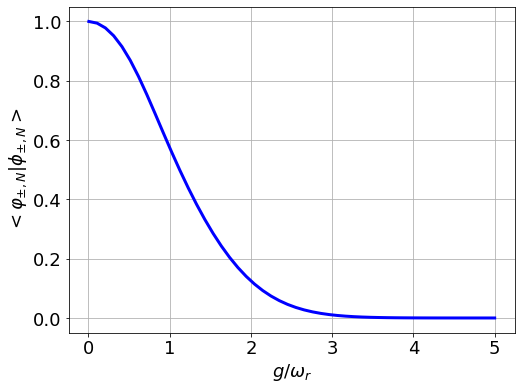

In [8]:
from pylab import rcParams
rcParams.update({'font.size': 18})
rcParams['figure.figsize'] = 8, 6
fig, ax = plt.subplots()

ax.plot(g_omg_list, [f[0][0] for f in F_g], 'b', linewidth=3)

ax.set_xlabel(r'$g/\omega_{r}$')
ax.set_ylabel(r'$<\varphi_{\pm,N}|\phi_{\pm,N}>$')

ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0),useOffset=False)
ax.grid(True)
plt.savefig('bare_dressed.pdf')